# case study
Lets say we are working for a social media company and there is a bad news coverage in the media about this company. We want to find if there is a change in user activity due to bad press. So, we plan an experiment where we take 70 days of user activity data- 35 days before and after news broke in the media. 
Our questions are:-
1. Is there change in user activity during this 70 days period.
2. If so, then when is the day that user activity started to change.

In [20]:
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(15, 4)

In [59]:
mu1, sigma1 = 25, 2 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 45)
mu2, sigma2 = 15, 2 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 25)

(10, 30)

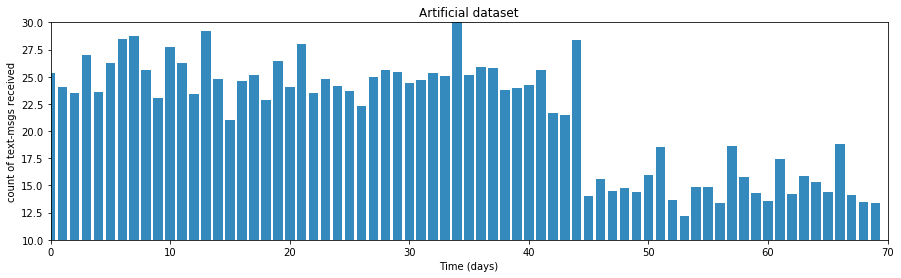

In [60]:
data= np.concatenate([s1,s2])
plt.bar(np.arange(70), data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Artificial dataset")
plt.xlim(0, 70)
plt.ylim(10,30)

In [61]:

import pymc as pm

alpha = 1.0 / data.mean()  # Recall count_data is the
                               # variable that holds our txt counts
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=len(data))

In [62]:
print(lambda_1)

lambda_1


In [63]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(len(data))
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

observation = pm.Poisson("obs", lambda_, value=data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])


# Mysterious code to be explained in Chapter 3.
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)


 [-----------------100%-----------------] 40000 of 40000 complete in 8.0 sec

In [64]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

(array([   6.,   11.,   26.,   39.,  106.,  168.,  325.,  593.,  896.,
        1352., 1953., 2311., 2557., 2958., 3149., 2892., 2533., 2281.,
        1813., 1507.,  999.,  585.,  387.,  278.,  141.,   76.,   31.,
          13.,    6.,    8.]),
 array([11.71875008, 11.9153379 , 12.11192571, 12.30851353, 12.50510134,
        12.70168916, 12.89827697, 13.09486479, 13.2914526 , 13.48804042,
        13.68462823, 13.88121605, 14.07780387, 14.27439168, 14.4709795 ,
        14.66756731, 14.86415513, 15.06074294, 15.25733076, 15.45391857,
        15.65050639, 15.8470942 , 16.04368202, 16.24026984, 16.43685765,
        16.63344547, 16.83003328, 17.0266211 , 17.22320891, 17.41979673,
        17.61638454]),
 <a list of 30 Patch objects>)

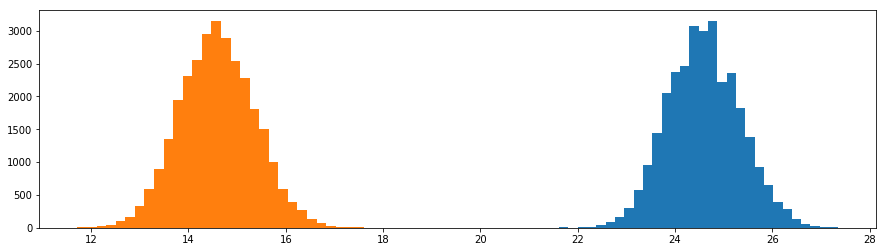

In [65]:
plt.hist(lambda_1_samples,bins=30)
plt.hist(lambda_2_samples,bins=30)

(array([3.33333333e-05, 1.00000000e-04, 2.73333333e-03, 5.16666667e-03,
        1.18333333e-02, 8.99833333e-01, 7.06000000e-02, 8.70000000e-03,
        8.33333333e-04, 1.66666667e-04]),
 array([40. , 40.9, 41.8, 42.7, 43.6, 44.5, 45.4, 46.3, 47.2, 48.1, 49. ]),
 <a list of 10 Patch objects>)

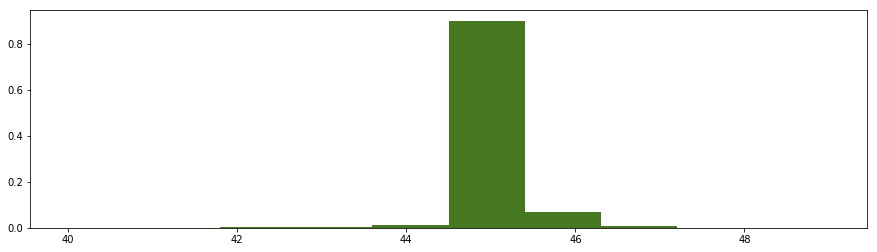

In [66]:
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)